In [1]:
import pandas as pd
train = pd.read_json('../MLtext2/MLtext2/data/train.json')
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [2]:
test = pd.read_json('../MLtext2/MLtext2/data/test.json')
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [3]:
train.isnull().sum()

cuisine        0
id             0
ingredients    0
dtype: int64

In [4]:
train.dtypes

cuisine        object
id              int64
ingredients    object
dtype: object

In [8]:
train.loc[0,'cuisine']

'greek'

In [10]:
type(train.loc[0, 'ingredients'])

list

In [11]:
train.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [12]:
train['num_ingredients'] = train.ingredients.apply(len)
train.head()

,cuisine,id,ingredients,num_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


In [13]:
train.groupby('cuisine').num_ingredients.mean()

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: num_ingredients, dtype: float64

In [15]:
train.groupby('cuisine').num_ingredients.describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,467.0,9.520343,5.555139,2.0,5.0,9.0,13.0,59.0
british,804.0,9.708955,4.165011,2.0,7.0,9.0,12.0,30.0
cajun_creole,1546.0,12.617076,4.611601,2.0,9.0,12.0,16.0,31.0
chinese,2673.0,11.982791,4.042125,2.0,9.0,12.0,14.0,38.0
filipino,755.0,10.000000,3.855135,2.0,7.0,10.0,12.0,38.0
french,2646.0,9.817838,4.144744,1.0,7.0,9.0,12.0,31.0
greek,1175.0,10.182128,3.729461,1.0,7.0,10.0,12.0,27.0
indian,3003.0,12.705961,5.016806,1.0,9.0,12.0,16.0,49.0
irish,667.0,9.299850,3.700505,2.0,7.0,9.0,12.0,27.0


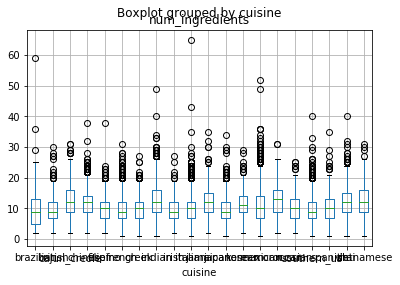

In [16]:
%matplotlib inline
train.boxplot('num_ingredients', by='cuisine')

In [17]:
sample_recipe = train.loc[3, 'ingredients']
sample_recipe

['water', 'vegetable oil', 'wheat', 'salt']

In [20]:
import numpy as np
def mean_string_length(list_of_strings):
    return np.mean([len(string) for string in list_of_strings])

In [21]:
mean_string_length(sample_recipe)

6.75

In [22]:
train['ingredient_length'] = train.ingredients.apply(mean_string_length)

In [23]:
train.head()

,cuisine,id,ingredients,num_ingredients,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


In [25]:
train['ingredient_length'] = train.ingredients.apply(lambda x: np.mean([len(string) for string in x]))

In [26]:
train.head()

,cuisine,id,ingredients,num_ingredients,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


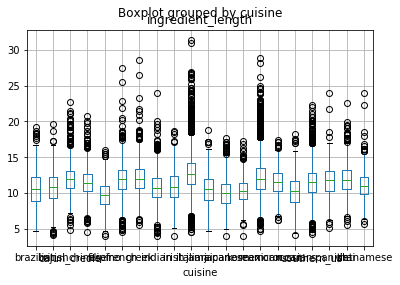

In [27]:
train.boxplot('ingredient_length', by='cuisine')

In [33]:
def make_features(df):
    df['num_ingredients'] = df.ingredients.apply(len)
    df['ingredient_length'] = df.ingredients.apply(lambda x: np.mean([len(string) for string in x]))
    return df

In [34]:
train = make_features(pd.read_json('../MLtext2/MLtext2/data/train.json'))
train.head()

,cuisine,id,ingredients,num_ingredients,ingredient_length
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


Part 3: Model evaluation using train_test_split

In [36]:
feature_cols = ['num_ingredients', 'ingredient_length']
X = train[feature_cols]
y = train.cuisine

In [37]:
y.shape

(39774,)

In [38]:
y.values

array(['greek', 'southern_us', 'filipino', ..., 'irish', 'chinese',
       'mexican'], dtype=object)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [45]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.21932823813354788

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.21591924749538957

In [50]:
y_test.value_counts().head(1) / y_test.shape

italian    0.199216
Name: cuisine, dtype: float64

In [51]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_pred_class = dumb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.1992156074014481

In [53]:
new = make_features(pd.read_json('../MLtext2/MLtext2/data/test.json'))
new.head()

,id,ingredients,num_ingredients,ingredient_length
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21,12.000000
4,35687,"[ground black pepper, salt, sausage casings, l...",8,13.000000


In [54]:
X_new = new[feature_cols]
X_new.head()

,num_ingredients,ingredient_length
0,6,9.333333
1,11,10.272727
2,6,9.666667
3,21,12.000000
4,8,13.000000


In [56]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [57]:
new_pred_class_knn = knn.predict(X_new)
new_pred_class_knn

array(['mexican', 'southern_us', 'mexican', ..., 'italian', 'mexican',
       'mexican'], dtype=object)

In [58]:
new_pred_class_knn.shape

(9944,)

In [63]:
pd.DataFrame({'id': new.id, 'cuisine': new_pred_class_knn }).set_index('id').to_csv('sub1.csv')

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {}
param_grid['n_neighbors'] = [100,200]
param_grid

{'n_neighbors': [100, 200]}

In [66]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [67]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [100, 200]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [70]:
grid.grid_scores_

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.21592, std: 0.00172, params: {'n_neighbors': 100},
 mean: 0.21949, std: 0.00181, params: {'n_neighbors': 200}]

In [71]:
param_grid = {}
param_grid['n_neighbors'] = list(range(200,1001,200))
param_grid

{'n_neighbors': [200, 400, 600, 800, 1000]}

In [72]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [73]:
%time grid.fit(X, y)

CPU times: user 3min 12s, sys: 22.8 s, total: 3min 35s
Wall time: 3min 47s


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [200, 400, 600, 800, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
grid.grid_scores_

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.21949, std: 0.00181, params: {'n_neighbors': 200},
 mean: 0.21994, std: 0.00331, params: {'n_neighbors': 400},
 mean: 0.22213, std: 0.00154, params: {'n_neighbors': 600},
 mean: 0.22296, std: 0.00191, params: {'n_neighbors': 800},
 mean: 0.22193, std: 0.00169, params: {'n_neighbors': 1000}]

In [79]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[0.2194901191733293,
 0.21994267612007845,
 0.2221300346960326,
 0.22295972243173934,
 0.2219288982752552]

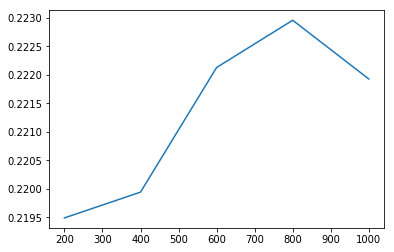

In [80]:
import matplotlib.pyplot as plt
plt.plot(list(range(200, 1001, 200)), grid_mean_scores)

In [82]:
grid.best_score_

0.22295972243173934

In [83]:
grid.best_params_

{'n_neighbors': 800}

In [84]:
train.loc[0, 'ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [85]:
train.ingredients.astype(str)[0]

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

In [86]:
def make_features(df):
    df['num_ingredients'] = df.ingredients.apply(len)
    df['ingredient_length'] = df.ingredients.apply(lambda x: np.mean([len(string) for string in x]))
    df['ingredients_str'] = df.ingredients.astype(str)
    return df

In [88]:
train = make_features(pd.read_json('../MLtext2/MLtext2/data/train.json'))

In [89]:
train.head()

,cuisine,id,ingredients,num_ingredients,ingredient_length,ingredients_str
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"['romaine lettuce', 'black olives', 'grape tom..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"['plain flour', 'ground pepper', 'salt', 'toma..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki..."
3,indian,22213,"[water, vegetable oil, wheat, salt]",4,6.750000,"['water', 'vegetable oil', 'wheat', 'salt']"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000,"['black pepper', 'shallots', 'cornflour', 'cay..."


In [90]:
train.loc[0, 'ingredients_str']

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

In [91]:
X = train.ingredients_str
y = train.cuisine

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

/Users/michaelreinhardme.com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [93]:
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [94]:
X_dtm = vect.fit_transform(X)
X_dtm.shape

(39774, 3010)

In [95]:
print(vect.get_feature_names()[0:100])

['00', '10', '100', '14', '15', '25', '33', '40', '43', '95', '96', 'abalone', 'abbamele', 'absinthe', 'abura', 'acai', 'accent', 'accompaniment', 'achiote', 'acid', 'acini', 'ackee', 'acorn', 'acting', 'activ', 'active', 'added', 'adobo', 'adzuki', 'agar', 'agave', 'age', 'aged', 'ahi', 'aioli', 'ajinomoto', 'ajwain', 'aka', 'alaskan', 'albacore', 'alcohol', 'ale', 'aleppo', 'alexia', 'alfalfa', 'alfredo', 'all', 'allspice', 'almond', 'almondmilk', 'almonds', 'aloe', 'alphabet', 'alum', 'amaranth', 'amarena', 'amaretti', 'amaretto', 'amba', 'amber', 'amberjack', 'amchur', 'america', 'american', 'aminos', 'ammonium', 'amontillado', 'ampalaya', 'an', 'anaheim', 'anasazi', 'ancho', 'anchovies', 'anchovy', 'and', 'andouille', 'anejo', 'angel', 'anglaise', 'angled', 'angostura', 'angus', 'anise', 'anisette', 'anjou', 'annatto', 'any', 'aonori', 'apple', 'apples', 'applesauce', 'applewood', 'apricot', 'apricots', 'aquavit', 'arak', 'arame', 'arbol', 'arborio', 'arctic']


In [98]:
vect = CountVectorizer(token_pattern=r"'([a-z ]+)'")
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)

In [100]:
X_dtm = vect.fit_transform(X)
vect.get_feature_names()[:100]

['a taste of thai rice noodles',
 'abalone',
 'abbamele',
 'absinthe',
 'abura age',
 'acai juice',
 'accent',
 'accent seasoning',
 'accompaniment',
 'achiote',
 'achiote paste',
 'achiote powder',
 'acini di pepe',
 'ackee',
 'acorn squash',
 'active dry yeast',
 'adobo',
 'adobo all purpose seasoning',
 'adobo sauce',
 'adobo seasoning',
 'adobo style seasoning',
 'adzuki beans',
 'agar',
 'agar agar flakes',
 'agave nectar',
 'agave tequila',
 'aged balsamic vinegar',
 'aged cheddar cheese',
 'aged gouda',
 'aged manchego cheese',
 'ahi',
 'ahi tuna steaks',
 'aioli',
 'ajinomoto',
 'ajwain',
 'aka miso',
 'alaskan king crab legs',
 'alaskan king salmon',
 'albacore',
 'albacore tuna in water',
 'alcohol',
 'ale',
 'aleppo',
 'aleppo pepper',
 'alexia waffle fries',
 'alfalfa sprouts',
 'alfredo sauce',
 'alfredo sauce mix',
 'all beef hot dogs',
 'all potato purpos',
 'all purpose seasoning',
 'all purpose unbleached flour',
 'allspice',
 'allspice berries',
 'almond butter',
 'al

In [101]:
X_dtm.shape

(39774, 6250)

In [102]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [103]:
cross_val_score(nb, X_dtm, y, cv=5, scoring='accuracy').mean()

0.7301267156198039

Part 7: Pipeline

In [104]:
train.describe()

,id,num_ingredients,ingredient_length
count,39774.000000,39774.000000,39774.000000
mean,24849.536959,10.767713,11.733187
std,14360.035505,4.428978,2.364183
min,0.000000,1.000000,4.000000
25%,12398.250000,8.000000,10.200000
50%,24887.000000,10.000000,11.625000
75%,37328.500000,13.000000,13.117647
max,49717.000000,65.000000,31.400000


In [106]:
from sklearn.preprocessing import Imputer

In [107]:
imp = Imputer(missing_values=1, strategy='median')

In [108]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(imp, knn)

In [109]:
pipe.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values=1, strategy='median', verbose=0)),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=100, p=2,
             weights='uniform'))]

In [110]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('imputer', imp),('kneighborsclassifier', knn)])

In [111]:
pipe.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values=1, strategy='median', verbose=0)),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=100, p=2,
             weights='uniform'))]

In [112]:
pipe.fit(X_train, y_train)
y_pred_class = pipe.predict(X_test)

In [113]:
metrics.accuracy_score(y_test, y_pred_class)

0.22043443282381336

In [114]:
pipe = make_pipeline(vect, nb)

In [115]:
pipe

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern="'([a-z ]+)'", tokenizer=None,
        vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [116]:
X.head()

0    ['romaine lettuce', 'black olives', 'grape tom...
1    ['plain flour', 'ground pepper', 'salt', 'toma...
2    ['eggs', 'pepper', 'salt', 'mayonaise', 'cooki...
3          ['water', 'vegetable oil', 'wheat', 'salt']
4    ['black pepper', 'shallots', 'cornflour', 'cay...
Name: ingredients_str, dtype: object

In [117]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7322884933790151